# Distribution check

In the dataset of latents, we have 4 classes: {UM_1, NYU} x {DX_GROUP = 1, DX_GROUP = 2}. In this notebook, we check wheter data in these classes follow Normal distribution.


In [2]:
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt
%matplotlib inline
from einops import rearrange
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson
import numpy as np
from sklearn.covariance import empirical_covariance
from scipy.linalg import sqrtm
from scipy.stats import ortho_group

In [3]:
nyu_data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_all'
um1_data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all'
nyu_dataset = LatentFMRIDataset(data_dir=nyu_data_directory)
um1_dataset = LatentFMRIDataset(data_dir=um1_data_directory)

In [4]:
nyu_1 = rearrange(nyu_dataset.get_items_from_class(cls=1)['X'], 'a b c d -> (a b c d)')
nyu_2 = rearrange(nyu_dataset.get_items_from_class(cls=2)['X'], 'a b c d -> (a b c d)')
um1_1 = rearrange(um1_dataset.get_items_from_class(cls=1)['X'], 'a b c d -> (a b c d)')
um1_2 = rearrange(um1_dataset.get_items_from_class(cls=2)['X'], 'a b c d -> (a b c d)')

In [5]:
nyu_1.shape, nyu_2.shape, um1_1.shape, um1_2.shape

((14515200,), (19555200,), (11554560,), (15632640,))

# Histogram

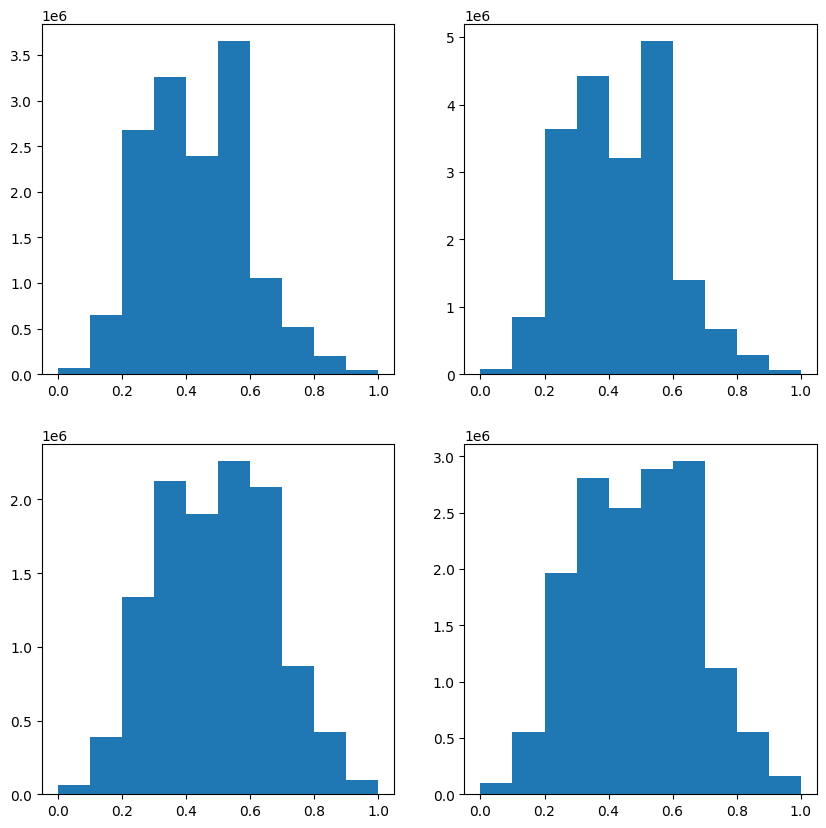

In [6]:
f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0, 0].hist(nyu_1)
axarr[0, 1].hist(nyu_2)
axarr[1, 0].hist(um1_1)
axarr[1, 1].hist(um1_2)
plt.show()

# QQPlot

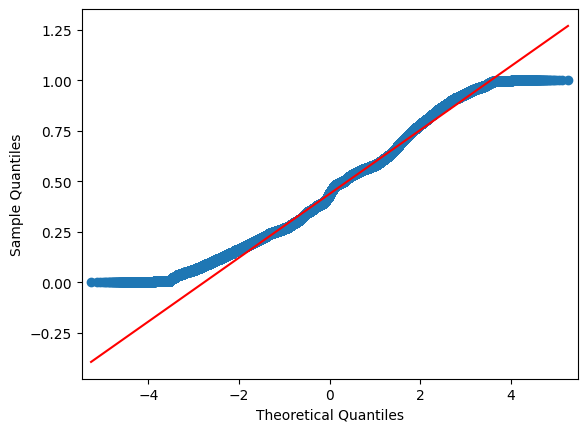

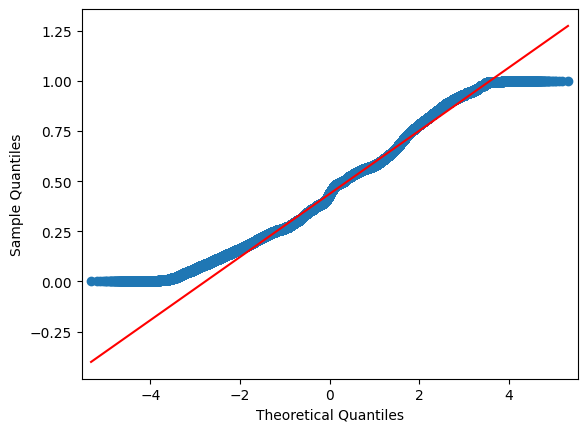

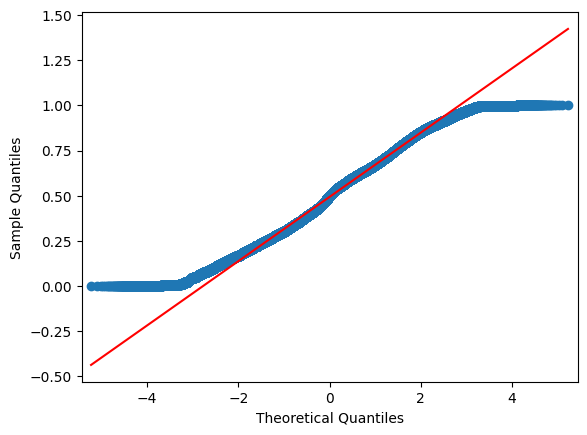

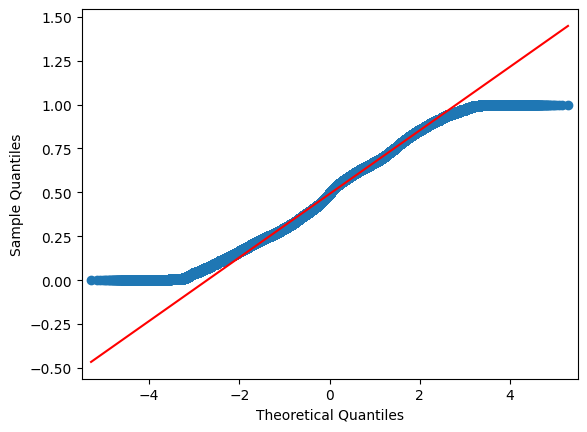

In [7]:
qqplot(data=nyu_1, line='s')
qqplot(data=nyu_2, line='s')
qqplot(data=um1_1, line='s')
qqplot(data=um1_2, line='s')
plt.show()

# Saphiro-Wilk test

In [8]:
for data in [nyu_1, nyu_2, um1_1, um1_2]:
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_7525/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14515200.
  stat, p = shapiro(data)


Statistics=0.985, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_7525/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19555200.
  stat, p = shapiro(data)


Statistics=0.984, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_7525/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11554560.
  stat, p = shapiro(data)


Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.990, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/z_/7fqm4zqs11zdv7cm41c6w_pc0000gn/T/ipykernel_7525/660632307.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15632640.
  stat, p = shapiro(data)


# D'Agostino K^2 test

In [9]:
for data in [nyu_1, nyu_2, um1_1, um1_2]:
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=215813.685, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=299820.514, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=320069.066, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=506807.715, p=0.000
Sample does not look Gaussian (reject H0)


# Anderson-Darling test

In [10]:
for data in [nyu_1, nyu_2, um1_1, um1_2]:
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 76346.018
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 105352.367
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 33689.808
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 55728.213
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does

# Empirical Covariance calculation

When the number of features is fixed and does not depend on the index of the sample, the empirical covariance matrix is a good estimator

In [11]:
nyu_1 = nyu_dataset.get_items_from_class(cls=1)['X']
nyu_2 = nyu_dataset.get_items_from_class(cls=2)['X']
um1_1 = um1_dataset.get_items_from_class(cls=1)['X']
um1_2 = um1_dataset.get_items_from_class(cls=2)['X']
nyu_1.shape, um1_1.shape, nyu_2.shape, um1_2.shape

((12600, 4, 16, 18),
 (10030, 4, 16, 18),
 (16975, 4, 16, 18),
 (13570, 4, 16, 18))

In [12]:
nyu_1 = rearrange(nyu_1, 'a b c d -> a (b c d)')
nyu_2 = rearrange(nyu_2, 'a b c d -> a (b c d)')
um1_1 = rearrange(um1_1, 'a b c d -> a (b c d)')
um1_2 = rearrange(um1_2, 'a b c d -> a (b c d)')

In [13]:
nyu_1.shape, um1_1.shape, nyu_2.shape, um1_2.shape

((12600, 1152), (10030, 1152), (16975, 1152), (13570, 1152))

In [14]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

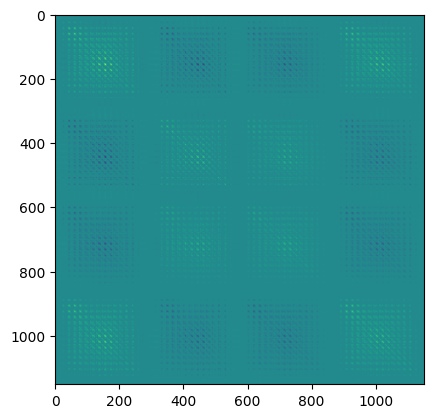

In [15]:
emprical_cov_mtx = empirical_covariance(nyu_1, assume_centered=False)
plt.imshow(emprical_cov_mtx)

In [16]:
for set in [um1_1, um1_2, nyu_1, nyu_2]:
    print(is_pos_def(empirical_covariance(set)))

True
True
True
True


In [23]:
c = empirical_covariance(nyu_1)
c_aff = empirical_covariance(um1_1)

c_r = sqrtm(c)
c_aff_r = sqrtm(c_aff)

# mean legyen 1x1152
mean_1_aff = np.mean(um1_1, axis=1)
mean_1 = np.mean(nyu_1, axis=1)

Q = ortho_group.rvs(dim=c_r.shape[0]) # bármilyen ortogonális mátrix ok

A_rec = c_aff_r * Q * np.linalg.inv(c_r)
b_rec = 0.0 # mean_1_aff - A_rec.dot(mean_1)
b_rec = np.expand_dims(b_rec, axis=-1)
# A_rec_inv = np.linalg.inv(A_rec)

z_original_inverse_1 = A_rec.dot(nyu_1.transpose()) + b_rec
z_original_inverse_1.shape

# TODO: z_original mean és covar és összehas az um1-el

(1152, 12600)

In [ ]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(x= X[:, 0], y= X[:, 1], z= X[:, 2], mode='markers',
    marker={
        'size': 10,
        'opacity': 0.1,
        'color': y
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 8, 'r': 8, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plotly.offline.iplot(plot_figure)